# 1.Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression, RFECV, SelectFromModel

# 2.Import file

In [ ]:
url = "https://drive.google.com/file/d/1PZbeonp5ndgEvKyg2-HMnGqgCUsp7hxy/view?usp=drive_link"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path, index_col="Id")

url = "https://drive.google.com/file/d/1BrtlUIVv4Cf0BsFjll_DOkeHmv16_TJM/view?usp=drive_link"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
test = pd.read_csv(path, index_col="Id")

data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
data_df=data.drop(columns=['Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature'], axis=1)

# 3.Creating a dummy model

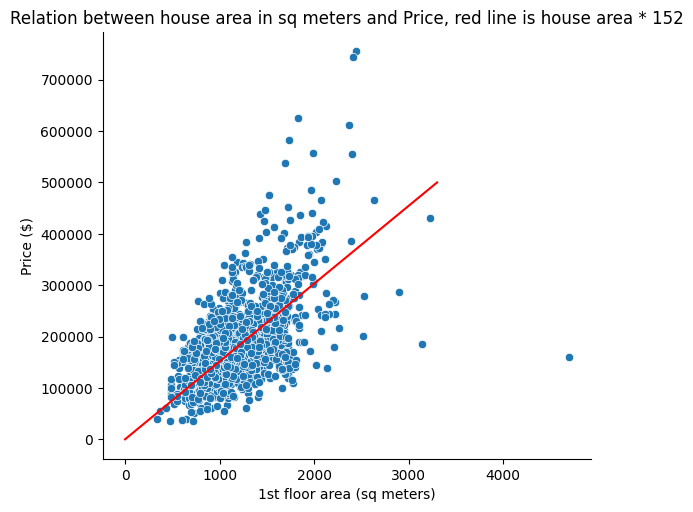

In [ ]:
(
  sns.relplot(data=data_df,
              x='1stFlrSF',
              y='SalePrice',
              height=5,
              aspect=1.2)
  .set(title='Relation between house area in sq meters and Price, red line is house area * 152')
  .set_axis_labels('1st floor area (sq meters)', 'Price ($)')
);
plt.plot([0, 3300], [0, 500000], 'r-')
plt.show();

In [ ]:
def dummy_model(area):
    return area * 152

In [ ]:
y = data['SalePrice'].copy()
X = data.drop('SalePrice', axis=1).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
# 1. defining categorical & numerical columns
X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()

In [ ]:
dummy_y_test_pred = dummy_model(X_test['1stFlrSF'])

In [ ]:
dummy_y_test_pred

,1stFlrSF
Id,
148,134368
677,166440
1305,148352
1373,168416
1428,159296
...,...
1013,136800
1060,166592
891,102144


# 4.Assessing a regression model with SKLearn

## 4.1.Mean Absolute Error (MAE)

In [ ]:
from sklearn.metrics import mean_absolute_error

dumb_mae = mean_absolute_error(y_true = y_test,
                               y_pred = dummy_y_test_pred)
dumb_mae

48187.33219178082

## 4.2.Root Mean Square Error (RMSE)

In [ ]:
from sklearn.metrics import root_mean_squared_error

dumb_rmse = root_mean_squared_error(y_true = y_test,
                               y_pred = dummy_y_test_pred)
dumb_rmse

67050.9871964908

## 4.3.Mean Absolute Percentage (MAPE)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

dumb_mape = mean_absolute_percentage_error(y_true = y_test,
                                           y_pred = dummy_y_test_pred)
dumb_mape

0.27118522394957345

## 4.4.R Squared (R2)

In [ ]:
from sklearn.metrics import r2_score

dumb_r2 = r2_score(y_true = y_test,
                   y_pred = dummy_y_test_pred)

dumb_r2

0.2724733021645377

# 5.Creating a SKLearn model

In [ ]:
X_num.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
set_config(display="diagram")
set_config(transform_output="pandas")

In [ ]:
numeric_pipe = make_pipeline(StandardScaler(),
    SimpleImputer(strategy="mean").set_output(transform="pandas"))

ordinal_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'KitchenQual',
                'BsmtFinType2', 'HeatingQC', 'GarageQual', 'GarageCond']

onehot_cols = ['MSZoning', 'Condition1', 'Heating', 'Street', 'CentralAir', 'Foundation', 'LotShape',
               'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition2', 'BldgType',
               'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Electrical',
               'GarageType', 'Functional',  'GarageFinish', 'PavedDrive', 'SaleType',
               'SaleCondition']

ExterQual_cats = ["N_A","Po","Fa","TA","Gd","Ex"]
ExterCond_cats = ["N_A","Po","Fa","TA","Gd","Ex"]
BsmtQual_cats = ["N_A","NA", "Po", "Fa","TA", "Gd", "Ex"]
BsmtCond_cats = ["N_A","NA", "Po", "Fa","TA", "Gd", "Ex"]
BsmtExposure_cats = ["N_A", "NA", "No", "Mn", "Av","Gd"]
BsmtFinType1_cats = ["N_A", "NA", "Unf", "LwQ", "Rec","BLQ","ALQ","GLQ"]
KitchenQual_cats = ["N_A", "Po", "Fa","TA", "Gd", "Ex"]
BsmtFinType2_cats = ["N_A", "NA", "Unf", "LwQ", "Rec","BLQ","ALQ","GLQ"]
HeatingQC_cats = ["N_A", "Po", "Fa","TA", "Gd", "Ex"]
GarageQual_cats = ["N_A","NA", "Po", "Fa","TA", "Gd", "Ex"]
GarageCond_cats =  ["N_A","NA", "Po", "Fa","TA", "Gd", "Ex"]

# # # 3.2.2. defining the categorical encoder: a ColumnTransformer with 2 branches: ordinal & onehot
categorical_encoder = ColumnTransformer(
    transformers=[
        ("cat_ordinal", OrdinalEncoder(categories=[ExterQual_cats, ExterCond_cats,BsmtQual_cats, BsmtCond_cats,
                                                   BsmtExposure_cats, BsmtFinType1_cats, KitchenQual_cats,
                                                   BsmtFinType2_cats, HeatingQC_cats, GarageQual_cats, GarageCond_cats
                                                   ]), ordinal_cols),
        ("cat_onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False), onehot_cols),
    ]
)

# # 3.3. categorical pipeline = "N_A" imputer + categorical encoder
categorical_pipe = make_pipeline(SimpleImputer(strategy="constant", fill_value="N_A"),
                                 categorical_encoder
                                )


# 4. full preprocessing: a ColumnTransformer with 2 branches: numeric & categorical
full_preprocessing = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),
        ("cat_pipe", categorical_pipe, X_cat.columns),
    ]
)

full_preprocessing

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('simpleimputer',
                                                  SimpleImputer())]),
                                 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'Bsmt...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])

## 5.1.DecisionTreeRegressor

Step-by-Step Process:

1. **Start with All Data:** Begin with the entire dataset.
2. **Find the Best Split:** Look for the feature and value that best splits the data into two groups to minimize prediction errors.
3. **Create Branches:** Split the data based on the best feature and value.
4. **Repeat:** Apply the same process recursively on each branch to create further splits until a stopping condition is met (like a maximum tree depth or minimum data points in a leaf).
5. **Make Predictions:** For a new data point, follow the decision rules down the branches of the tree to reach a leaf node, which provides the predicted value.

!!! Use grid search CV to modify the parameters and reduce errors

In [ ]:
dt_pipeline_trimmed = make_pipeline(full_preprocessing,
                            DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=4))

dt_pipeline_trimmed.fit(X_train, y_train)
dt_predictions_trimmed = dt_pipeline_trimmed.predict(X_test)

In [ ]:
dt_pipeline = make_pipeline(full_preprocessing,
                            DecisionTreeRegressor())

dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFl...
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [ ]:
dt_predictions = dt_pipeline.predict(X_test)

In [ ]:
dt_r2 = r2_score(y_true = y_test,
                 y_pred = dt_predictions)

errors_r2 = pd.DataFrame({"R2": [dumb_r2, dt_r2]},
             index=["dumb_model", "decision_tree"])

performances_r2 = pd.DataFrame({'decision_tree': dt_r2,
                             'dump': dumb_r2},
                            index=['baseline'])

performances_r2

,decision_tree,dump
baseline,0.785774,0.272473


In [ ]:
dt_mape = mean_absolute_percentage_error(y_true = y_test,
                                           y_pred = dt_predictions)
errors_mape = pd.DataFrame({"MAPE": [dumb_mape, dt_mape]},
             index=["dumb_model", "decision_tree"])

performances_mape = pd.DataFrame({'decision_tree': dt_mape,
                             'dump': dumb_mape},
                            index=['baseline'])

performances_mape

,decision_tree,dump
baseline,0.133506,0.271185


In [ ]:
dt_rmse = root_mean_squared_error(y_true = y_test,
                                           y_pred = dt_predictions)
errors_rmse = pd.DataFrame({"RMSE": [dumb_rmse, dt_rmse]},
             index=["dumb_model", "decision_tree"])

performances_rmse = pd.DataFrame({'decision_tree': dt_rmse,
                             'dump': dumb_rmse},
                            index=['baseline'])

performances_rmse

,decision_tree,dump
baseline,36384.52069,67050.987196


In [ ]:
dt_mae = mean_absolute_error(y_true = y_test,
                            y_pred = dt_predictions)
errors_mae = pd.DataFrame({"MAE": [dumb_mae, dt_mae]},
             index=["dumb_model", "decision_tree"])

performances_mae = pd.DataFrame({'decision_tree': dt_mae,
                             'dump': dumb_mae},
                            index=['baseline'])

performances_mae

,decision_tree,dump
baseline,24113.835616,48187.332192


## 5.2.KNN

In [ ]:
knn_pipeline = make_pipeline(full_preprocessing,
                            KNeighborsRegressor(n_neighbors=1))

knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFl...
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=1))])

In [ ]:
knn_predictions = knn_pipeline.predict(X_test)

In [ ]:
knn_r2 = r2_score(y_true = y_test,
                 y_pred = knn_predictions)

errors_r2 = pd.DataFrame({"R2": [dumb_r2, dt_r2,knn_r2]},
             index=["dumb_model", "decision_tree","knn"])

performances_r2 = pd.DataFrame({'decision_tree': dt_r2,
                             'dump': dumb_r2,
                             'knn': knn_r2},
                            index=['baseline'])

performances_r2

,decision_tree,dump,knn
baseline,0.785774,0.272473,0.784122


In [ ]:
knn_mape = mean_absolute_percentage_error(y_true = y_test,
                                           y_pred = knn_predictions)
errors_mape = pd.DataFrame({"MAPE": [dumb_mape, dt_mape,knn_mape]},
             index=["dumb_model", "decision_tree","knn"])

performances_mape = pd.DataFrame({'decision_tree': dt_mape,
                             'dump': dumb_mape,
                              'knn': knn_mape},
                            index=['baseline'])

performances_mape

,decision_tree,dump,knn
baseline,0.133506,0.271185,0.127716


In [ ]:
knn_rmse = root_mean_squared_error(y_true = y_test,
                                           y_pred = knn_predictions)
errors_rmse = pd.DataFrame({"RMSE": [dumb_rmse, dt_rmse,knn_rmse]},
             index=["dumb_model", "decision_tree","knn"])

performances_rmse = pd.DataFrame({'decision_tree': dt_rmse,
                             'dump': dumb_rmse,
                             'knn' : knn_rmse},
                            index=['baseline'])

performances_rmse

,decision_tree,dump,knn
baseline,36384.52069,67050.987196,36524.546338


In [ ]:
knn_mae = mean_absolute_error(y_true = y_test,
                            y_pred = knn_predictions)
errors_mae = pd.DataFrame({"MAE": [dumb_mae, dt_mae,knn_mae]},
             index=["dumb_model", "decision_tree","knn"])

performances_mae = pd.DataFrame({'decision_tree': dt_mae,
                             'dump': dumb_mae,
                              'knn':knn_mae},
                            index=['baseline'])

performances_mae

,decision_tree,dump,knn
baseline,24113.835616,48187.332192,23051.133562


## 5.3.SGDRegressor

Step-by-Step Process:

1. **Initialize Weights:** Start with random values for the model’s parameters (weights).
2. **Choose a Data Batch:** Pick a small, random subset of the training data.
3. **Calculate Error:** Use the current weights to make predictions and calculate the difference between predicted and actual values (error).
4. **Update Weights:** Adjust the weights slightly in the direction that reduces the error based on the gradient of the error with respect to the weights.
5. **Repeat:** Continue selecting new batches and updating weights until the model’s performance stabilizes or a set number of iterations is reached.
6. **Make Predictions:** Use the final weights to predict values for new data.

In [ ]:
sgd_pipeline = make_pipeline(full_preprocessing,
                            StandardScaler(),
                            SGDRegressor())

sgd_pipeline.fit(X_train, y_train)

sgd_predictions = sgd_pipeline.predict(X_test)

In [ ]:
sgd_r2 = r2_score(y_true = y_test,
                 y_pred = sgd_predictions)

errors_r2 = pd.DataFrame({"R2": [dumb_r2, dt_r2,knn_r2,sgd_r2]},
             index=["dumb_model", "decision_tree","knn","sgd"])

performances_r2 = pd.DataFrame({'decision_tree': dt_r2,
                             'dump': dumb_r2,
                             'knn': knn_r2,
                              'sgd': sgd_r2},
                            index=['baseline'])

performances_r2

,decision_tree,dump,knn,sgd
baseline,0.785774,0.272473,0.784122,-114.599122


In [ ]:
sgd_mape = mean_absolute_percentage_error(y_true = y_test,
                                           y_pred = sgd_predictions)
errors_mape = pd.DataFrame({"MAPE": [dumb_mape, dt_mape,knn_mape,sgd_mape]},
             index=["dumb_model", "decision_tree","knn","sgd"])

performances_mape = pd.DataFrame({'decision_tree': dt_mape,
                              'dump': dumb_mape,
                              'knn': knn_mape,
                              'sgd':sgd_mape},
                            index=['baseline'])

performances_mape

,decision_tree,dump,knn,sgd
baseline,0.133506,0.271185,0.127716,3.645565


In [ ]:
sgd_rmse = root_mean_squared_error(y_true = y_test,
                                           y_pred = sgd_predictions)
errors_rmse = pd.DataFrame({"RMSE": [dumb_rmse, dt_rmse,knn_rmse,sgd_rmse]},
             index=["dumb_model", "decision_tree","knn","sgd"])

performances_rmse = pd.DataFrame({'decision_tree': dt_rmse,
                             'dump': dumb_rmse,
                             'knn' : knn_rmse,
                             'sgd':sgd_rmse},
                            index=['baseline'])

performances_rmse

,decision_tree,dump,knn,sgd
baseline,36384.52069,67050.987196,36524.546338,845197.057442


In [ ]:
sgd_mae = mean_absolute_error(y_true = y_test,
                            y_pred = sgd_predictions)
errors_mae = pd.DataFrame({"MAE": [dumb_mae, dt_mae,knn_mae,sgd_mae]},
             index=["dumb_model", "decision_tree","knn","sgd"])

performances_mae = pd.DataFrame({'decision_tree': dt_mae,
                             'dump': dumb_mae,
                              'knn':knn_mae,
                              'sgd':sgd_mae},
                            index=['baseline'])

performances_mae

,decision_tree,dump,knn,sgd
baseline,24113.835616,48187.332192,23051.133562,549611.237911


## 5.4.LinearRegression

1. **Assume a Model:** Start with a linear equation of the form: 𝑦 = weights × features + bias
2. **Fit the Line:** Adjust the weights and bias to find the line that best fits the data points.
3. **Calculate Predictions:** Use the current weights and bias to predict values for the training data.
4. **Measure Error:** Find the difference between predicted values and actual values.
5. **Adjust Parameters:** Update weights and bias to minimize the error.
6. **Optimize Line:** Repeat adjusting weights and bias until the line best fits the data points.
7. **Make Predictions:** Use the final line equation to predict values for new data.

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:

cv_scores= cross_validate(lr,X_train, y_train,scoring='neg_root_mean_squared_log_error', njobs=)

SyntaxError: invalid syntax (<ipython-input-36-bdd9808dcc5b>, line 1)

In [ ]:
lr_pipeline = make_pipeline(full_preprocessing,
                            StandardScaler(),
                            LinearRegression())

lr_pipeline.fit(X_train, y_train)

#cv_scores= cross_validate(lr,X_train, y_train,scoring='neg_root_mean_squared_log_error', njobs=-2,return_estimator=True)

lr_predictions = lr_pipeline.predict(X_test)

In [ ]:
lr_r2 = r2_score(y_true = y_test,
                 y_pred = lr_predictions)

errors_r2 = pd.DataFrame({"R2": [dumb_r2, dt_r2,knn_r2,sgd_r2,lr_r2]},
             index=["dumb_model", "decision_tree","knn","sgd","lr"])

performances_r2 = pd.DataFrame({'decision_tree': dt_r2,
                             'dump': dumb_r2,
                             'knn': knn_r2,
                             'sgd': sgd_r2,
                             'lr':lr_r2},
                            index=['baseline'])

performances_r2

,decision_tree,dump,knn,sgd,lr
baseline,0.785774,0.272473,0.784122,-114.599122,-3.147637e+20


In [ ]:
lr_mape = mean_absolute_percentage_error(y_true = y_test,
                                           y_pred = lr_predictions)
errors_mape = pd.DataFrame({"MAPE": [dumb_mape, dt_mape,knn_mape,sgd_mape,lr_mape]},
             index=["dumb_model", "decision_tree","knn","sgd","lr"])

performances_mape = pd.DataFrame({'decision_tree': dt_mape,
                              'dump': dumb_mape,
                              'knn': knn_mape,
                              'sgd':sgd_mape,
                              'lr':lr_mape},
                            index=['baseline'])

performances_mape

,decision_tree,dump,knn,sgd,lr
baseline,0.133506,0.271185,0.127716,3.645565,9.702392e+08


In [ ]:
lr_rmse = root_mean_squared_error(y_true = y_test,
                                           y_pred = lr_predictions)
errors_rmse = pd.DataFrame({"RMSE": [dumb_rmse, dt_rmse,knn_rmse,sgd_rmse,lr_rmse]},
             index=["dumb_model", "decision_tree","knn","sgd","lr"])

performances_rmse = pd.DataFrame({'decision_tree': dt_rmse,
                             'dump': dumb_rmse,
                             'knn' : knn_rmse,
                             'sgd':sgd_rmse,
                             'lr':lr_rmse},
                            index=['baseline'])

performances_rmse

,decision_tree,dump,knn,sgd,lr
baseline,36384.52069,67050.987196,36524.546338,845197.057442,1.394675e+15


In [ ]:
lr_mae = mean_absolute_error(y_true = y_test,
                            y_pred = lr_predictions)
errors_mae = pd.DataFrame({"MAE": [dumb_mae, dt_mae,knn_mae,sgd_mae,lr_mae]},
             index=["dumb_model", "decision_tree","knn","sgd","lr"])

performances_mae = pd.DataFrame({'decision_tree': dt_mae,
                             'dump': dumb_mae,
                              'knn':knn_mae,
                              'sgd':sgd_mae,
                              'lr':lr_mae},
                            index=['baseline'])

performances_mae

,decision_tree,dump,knn,sgd,lr
baseline,24113.835616,48187.332192,23051.133562,549611.237911,1.369003e+14


# 6.Feature selection based only on features 🔨




## 6.1. Variance Threshold

In [ ]:
X_train_processed = full_preprocessing.fit_transform(X_train)
X_test_processed = full_preprocessing.transform(X_test)

In [ ]:
# Scaling the data

# Initialize the scaler.
my_scaler = MinMaxScaler().set_output(transform="pandas")

# Fit the scaler to X_train and transform the values.
X_train_scaled = my_scaler.fit_transform(X_train_processed)
X_test_scaled = my_scaler.transform(X_test_processed)

In [ ]:
(
  pd.DataFrame({
  'Range': X_train_scaled.max() - X_train_scaled.min(),
  'Variance': X_train_scaled.var()})
  .sort_values(by='Variance')
)

,Range,Variance
cat_pipe__cat_onehot__RoofMatl_Metal,1.0,0.000856
cat_pipe__cat_onehot__Heating_Floor,1.0,0.000856
cat_pipe__cat_onehot__Neighborhood_Blueste,1.0,0.000856
cat_pipe__cat_onehot__Exterior2nd_CBlock,1.0,0.000856
cat_pipe__cat_onehot__Exterior1st_CBlock,1.0,0.000856
...,...,...
cat_pipe__cat_onehot__GarageType_Attchd,1.0,0.239115
cat_pipe__cat_onehot__GarageFinish_Unf,1.0,0.242878
cat_pipe__cat_onehot__Foundation_PConc,1.0,0.245864
cat_pipe__cat_onehot__Foundation_CBlock,1.0,0.246619


In [ ]:
selector = VarianceThreshold(threshold=0.02)

X_train_var = selector.fit_transform(X_train_scaled)

In [ ]:
print("shape before:", X_train_scaled.shape)
print("shape after:", X_train_var.shape)

shape before: (1168, 225)
shape after: (1168, 115)


In [ ]:
# Apply the variance threshold to the scaled test set
X_test_var = selector.transform(X_test_scaled)

Let's check how well our model performs with the new dataset

In [ ]:
performances_r2

,decision_tree,dump,knn,sgd,lr
baseline,0.785774,0.272473,0.784122,-114.599122,-3.147637e+20


In [ ]:
# Decision tree.
var_dt_pipeline =  DecisionTreeRegressor()
var_dt_pipeline.fit(X_train_var, y_train)
var_dt_pred = var_dt_pipeline.predict(X_test_var)

In [ ]:
# SGD
var_sgd_pipeline = SGDRegressor()
var_sgd_pipeline.fit(X_train_var, y_train)
var_sgd_pred = var_sgd_pipeline.predict(X_test_var)

In [ ]:
# LR
var_lr_pipeline = LinearRegression()
var_lr_pipeline.fit(X_train_var, y_train)
var_lr_pred = var_lr_pipeline.predict(X_test_var)

In [ ]:
# K-Nearest Neighbors.
var_knn_pipeline = KNeighborsRegressor(n_neighbors=1)
var_knn_pipeline.fit(X_train_var, y_train)
var_knn_pred = var_dt_pipeline.predict(X_test_var)

performances_r2.loc["varThreshold_0_02", "decision_tree"] = r2_score(y_test, var_dt_pred)
performances_r2.loc["varThreshold_0_02", "knn"] = r2_score(y_test, var_knn_pred)
performances_r2.loc["varThreshold_0_02", "sgd"] = r2_score(y_test, var_sgd_pred)
performances_r2.loc["varThreshold_0_02", "lr"] = r2_score(y_test, var_lr_pred)

performances_r2


,decision_tree,dump,knn,sgd,lr
baseline,0.785774,0.272473,0.784122,-114.599122,-3.147637e+20
varThreshold_0_02,0.710637,NaN,0.710637,0.831662,8.501412e-01


In [ ]:
performances_rmse.loc["varThreshold_0_02", "decision_tree"] = root_mean_squared_error(y_test, var_dt_pred)
performances_rmse.loc["varThreshold_0_02", "knn"] = root_mean_squared_error(y_test, var_knn_pred)
performances_rmse.loc["varThreshold_0_02", "sgd"] = root_mean_squared_error(y_test, var_sgd_pred)
performances_rmse.loc["varThreshold_0_02", "lr"] = root_mean_squared_error(y_test, var_lr_pred)

performances_rmse

,decision_tree,dump,knn,sgd,lr
baseline,36384.520690,67050.987196,36524.546338,845197.057442,1.394675e+15
varThreshold_0_02,42286.547955,NaN,42286.547955,32253.139679,3.043139e+04


## 6.2.Collinearity

In [ ]:
corrMatrix = X_train_processed.corr().abs()

In [ ]:
# Set the correlation threshold to consider columns as highly correlated
correlation_threshold = 0.95

# Initialise an empty list to store the pairs of highly correlated columns
highly_correlated_columns = []

# Get the number of features (columns) in the correlation matrix
num_features = len(corrMatrix.columns)

# Loop through the upper triangle of the correlation matrix to find highly correlated columns
# Note: We start from i+1 to avoid redundancy as correlation_matrix is symmetric
for i in range(num_features):
    for j in range(i + 1, num_features):
        # Check if the correlation value between columns i and j is greater than or equal to the threshold
        if corrMatrix.iloc[i, j] >= correlation_threshold:
            # Append the tuple (column_i, column_j) to the list of highly correlated columns
            highly_correlated_columns.append((corrMatrix.columns[i], corrMatrix.columns[j], f"correlation = {round(corrMatrix.iloc[i, j], 2)}"))

# Print the pairs of highly correlated columns
print("Highly correlated columns:", highly_correlated_columns)

Highly correlated columns: [('cat_pipe__cat_ordinal__GarageQual', 'cat_pipe__cat_ordinal__GarageCond', 'correlation = 0.98'), ('cat_pipe__cat_ordinal__GarageQual', 'cat_pipe__cat_onehot__GarageType_N_A', 'correlation = 0.97'), ('cat_pipe__cat_ordinal__GarageQual', 'cat_pipe__cat_onehot__GarageFinish_N_A', 'correlation = 0.97'), ('cat_pipe__cat_ordinal__GarageCond', 'cat_pipe__cat_onehot__GarageType_N_A', 'correlation = 0.97'), ('cat_pipe__cat_ordinal__GarageCond', 'cat_pipe__cat_onehot__GarageFinish_N_A', 'correlation = 0.97'), ('cat_pipe__cat_onehot__Street_Grvl', 'cat_pipe__cat_onehot__Street_Pave', 'correlation = 1.0'), ('cat_pipe__cat_onehot__CentralAir_N', 'cat_pipe__cat_onehot__CentralAir_Y', 'correlation = 1.0'), ('cat_pipe__cat_onehot__Utilities_AllPub', 'cat_pipe__cat_onehot__Utilities_NoSeWa', 'correlation = 1.0'), ('cat_pipe__cat_onehot__Exterior1st_CBlock', 'cat_pipe__cat_onehot__Exterior2nd_CBlock', 'correlation = 1.0'), ('cat_pipe__cat_onehot__Exterior1st_CemntBd', 'cat_p

In [ ]:
to_drop = [element_a for element_a, element_b, element_c in highly_correlated_columns]
to_drop

['cat_pipe__cat_ordinal__GarageQual',
 'cat_pipe__cat_ordinal__GarageQual',
 'cat_pipe__cat_ordinal__GarageQual',
 'cat_pipe__cat_ordinal__GarageCond',
 'cat_pipe__cat_ordinal__GarageCond',
 'cat_pipe__cat_onehot__Street_Grvl',
 'cat_pipe__cat_onehot__CentralAir_N',
 'cat_pipe__cat_onehot__Utilities_AllPub',
 'cat_pipe__cat_onehot__Exterior1st_CBlock',
 'cat_pipe__cat_onehot__Exterior1st_CemntBd',
 'cat_pipe__cat_onehot__Exterior1st_MetalSd',
 'cat_pipe__cat_onehot__Exterior1st_VinylSd',
 'cat_pipe__cat_onehot__GarageType_N_A',
 'cat_pipe__cat_onehot__SaleType_New']

In [ ]:
# Drop the columns from the train set.
X_train_processed_corr = X_train_processed.drop(columns=to_drop).copy()

# Drop the columns from the test set.
X_test_processed_corr = X_test_processed.drop(columns=to_drop).copy()

In [ ]:
# Decision tree.
corr_dt = DecisionTreeRegressor()
corr_dt.fit(X_train_processed_corr, y_train)
corr_dt_pred = corr_dt.predict(X_test_processed_corr)

# K-Nearest Neighbors.
corr_knn = KNeighborsRegressor(n_neighbors=1)
corr_knn.fit(X_train_processed_corr, y_train)
corr_knn_pred = corr_knn.predict(X_test_processed_corr)

# LR.
corr_lr = LinearRegression()
corr_lr.fit(X_train_processed_corr, y_train)
corr_lr_pred = corr_lr.predict(X_test_processed_corr)

# SGD
corr_sgd = SGDRegressor(alpha= 0.01, learning_rate = 'invscaling', max_iter =2000, penalty = 'elasticnet')
corr_sgd.fit(X_train_processed_corr, y_train)
corr_sgd_pred = corr_sgd.predict(X_test_processed_corr)

performances_r2.loc["collinearity", "decision_tree"] = r2_score(y_test, corr_dt_pred)
performances_r2.loc["collinearity", "knn"] = r2_score(y_test, corr_knn_pred)
performances_r2.loc["collinearity", "lr"] = r2_score(y_test, corr_lr_pred)
performances_r2.loc["collinearity", "sgd"] = r2_score(y_test, corr_sgd_pred)

performances_r2

,decision_tree,dump,knn,sgd,lr
baseline,0.785774,0.272473,0.784122,-114.599122,-3.147637e+20
varThreshold_0_02,0.710637,NaN,0.710637,0.831662,8.501412e-01
collinearity,0.753455,NaN,0.778767,0.851442,-9.621014e+14


In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

# Define the pipeline
sgd_pipeline = make_pipeline(full_preprocessing, SGDRegressor())

# Define the parameter grid
param_grid = {
    "sgdregressor__alpha": [1e-4, 1e-3, 1e-2, 1e-1],
    "sgdregressor__max_iter": [1000, 2000, 3000],
    "sgdregressor__penalty": ['l2', 'l1', 'elasticnet'],
    "sgdregressor__learning_rate": ['constant', 'optimal', 'invscaling', 'adaptive']
}

# Initialize GridSearchCV
grid_search_sgd = GridSearchCV(
    estimator=sgd_pipeline,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',  # rmse
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1
)

# Fit GridSearchCV on the training data
grid_search_sgd.fit(X_train, y_train)

# Display the best parameters and best score
print("Best Parameters:", grid_search_sgd.best_params_)
print("Best Cross-Validation Score:", grid_search_sgd.best_score_)

# Make predictions using the best model
best_sgd_model = grid_search_sgd.best_estimator_
sgd_pred = best_sgd_model.predict(X_test)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'sgdregressor__alpha': 0.1, 'sgdregressor__learning_rate': 'invscaling', 'sgdregressor__max_iter': 2000, 'sgdregressor__penalty': 'elasticnet'}
Best Cross-Validation Score: -35955.49874093926


In [ ]:
test_processed = full_preprocessing.transform(test)
test_processed_corr = test_processed.drop(columns=to_drop).copy()
corr_sgd_pred_test = corr_sgd.predict(test_processed_corr)

pd.DataFrame(corr_sgd_pred_test, index=test.index, columns=['SalePrice']).to_csv('../content/test_sgd_GridSearch_1.csv')

In [ ]:
performances_mape.loc["collinearity", "decision_tree"] = mean_absolute_percentage_error(y_test, corr_dt_pred)
performances_mape.loc["collinearity", "knn"] = mean_absolute_percentage_error(y_test, corr_knn_pred)
performances_mape.loc["collinearity", "lr"] = mean_absolute_percentage_error(y_test, corr_lr_pred)
performances_mape.loc["collinearity", "sgd"] = mean_absolute_percentage_error(y_test, corr_sgd_pred)

performances_mape

,decision_tree,dump,knn,sgd,lr
baseline,0.133663,0.271185,0.127716,1.685590,9.702392e+08
collinearity,0.135640,NaN,0.125294,0.105756,1.106140e+06


In [ ]:
performances_mae.loc["collinearity", "decision_tree"] = mean_absolute_error(y_test, corr_dt_pred)
performances_mae.loc["collinearity", "knn"] = mean_absolute_error(y_test, corr_knn_pred)
performances_mae.loc["collinearity", "lr"] = mean_absolute_error(y_test, corr_lr_pred)
performances_mae.loc["collinearity", "sgd"] = mean_absolute_error(y_test, corr_sgd_pred)

performances_mae

,decision_tree,dump,knn,sgd,lr
baseline,24070.424658,48187.332192,23051.133562,261599.478410,1.369003e+14
collinearity,24795.037671,NaN,22891.893836,17993.333943,1.426920e+11


In [ ]:
performances_rmse.loc["collinearity", "decision_tree"] = root_mean_squared_error(y_test, corr_dt_pred)
performances_rmse.loc["collinearity", "knn"] = root_mean_squared_error(y_test, corr_knn_pred)
performances_rmse.loc["collinearity", "lr"] = root_mean_squared_error(y_test, corr_lr_pred)
performances_rmse.loc["collinearity", "sgd"] = root_mean_squared_error(y_test, corr_sgd_pred)

performances_rmse

,decision_tree,dump,knn,sgd,lr
baseline,36543.372227,67050.987196,36524.546338,385082.575956,1.394675e+15
collinearity,39663.688700,NaN,36974.821421,28043.682892,2.438322e+12
KBest_10,36610.357017,NaN,37916.885565,33071.138688,3.375345e+04
RFE,41887.561006,NaN,NaN,NaN,NaN
varThreshold_0_02,42204.046171,NaN,42204.046171,32151.784159,3.043139e+04
model_selected,42027.176449,NaN,38509.746643,35303.645435,3.407492e+04


# 7.Feature selection based on features and labels 🔧

## 7.1.K Best

In [ ]:
# Run the univariate (= one feature at a time) linear regression tests.
f_stat, _ = f_regression(X_train_processed, y_train)

# Create a DataFrame with the f-statistics and p-values.
f_test = pd.DataFrame({"f_stat":f_stat},
                      index=X_train_processed.columns)

# Sort the values in the f-statistic column.
f_test.sort_values("f_stat", ascending=False)

,f_stat
num_pipe__OverallQual,1922.824164
num_pipe__GrLivArea,1077.898355
cat_pipe__cat_ordinal__ExterQual,1037.721079
cat_pipe__cat_ordinal__KitchenQual,862.611176
num_pipe__GarageCars,806.217393
...,...
cat_pipe__cat_onehot__HouseStyle_2.5Fin,0.009037
num_pipe__BsmtHalfBath,0.001423
cat_pipe__cat_onehot__BldgType_TwnhsE,0.000581
cat_pipe__cat_onehot__RoofMatl_Metal,0.000081


In [ ]:
# Initialise KBest, using the f-regression and setting k=10.
KBest = SelectKBest(score_func=f_regression, k=15)

In [ ]:
# Transform the train set.
X_train_KBest = KBest.fit_transform(X_train_processed, y_train).copy()

# Transform the test set.
X_test_KBest = KBest.transform(X_test_processed).copy()

In [ ]:
X_train_KBest.shape, X_test_KBest.shape

((1168, 15), (292, 15))

Let's see how our models perform with these 10 "best" features:

In [ ]:
# Decision tree.
k10_tree = DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=4)
k10_tree.fit(X_train_KBest, y_train)
k10_tree_pred = k10_tree.predict(X_test_KBest)

In [ ]:
# Decision tree.
k10_tree = DecisionTreeRegressor()
k10_tree.fit(X_train_KBest, y_train)
k10_tree_pred = k10_tree.predict(X_test_KBest)

In [ ]:


# K-Nearest Neighbors.
k10_knn = KNeighborsRegressor(n_neighbors=1)
k10_knn.fit(X_train_KBest, y_train)
k10_knn_pred = k10_knn.predict(X_test_KBest)

# Sgd
k10_sgd = SGDRegressor()
k10_sgd.fit(X_train_KBest, y_train)
k10_sgd_pred = k10_sgd.predict(X_test_KBest)

# lr
k10_lr = LinearRegression()
k10_lr.fit(X_train_KBest, y_train)
k10_lr_pred = k10_lr.predict(X_test_KBest)

performances_r2.loc["KBest_10", "decision_tree"]= r2_score(y_test, k10_tree_pred)
performances_r2.loc["KBest_10", "knn"] = r2_score(y_test, k10_knn_pred)
performances_r2.loc["KBest_10", "sgd"] = r2_score(y_test, k10_sgd_pred)
performances_r2.loc["KBest_10", "lr"] = r2_score(y_test, k10_lr_pred)

performances_r2

,decision_tree,dump,knn,sgd,lr
baseline,0.783899,0.272473,0.784122,-22.996413,-3.147637e+20
varThreshold_0_02,0.690911,NaN,0.690911,0.834904,8.501412e-01
collinearity,0.751391,NaN,0.778767,0.871317,-9.621014e+14
KBest_10,0.783107,NaN,0.767350,0.815637,8.230148e-01
RFE,0.716072,NaN,NaN,NaN,NaN
model_selected,0.714176,NaN,0.760017,0.798313,8.121080e-01


In [ ]:
performances_rmse.loc["KBest_10", "decision_tree"] = root_mean_squared_error(y_test, k10_tree_pred)
performances_rmse.loc["KBest_10", "knn"] = root_mean_squared_error(y_test, k10_knn_pred)
performances_rmse.loc["KBest_10", "lr"] = root_mean_squared_error(y_test, k10_sgd_pred)
performances_rmse.loc["KBest_10", "sgd"] = root_mean_squared_error(y_test, k10_lr_pred)

performances_rmse

,decision_tree,dump,knn,sgd,lr
baseline,36543.372227,67050.987196,36524.546338,385082.575956,1.394675e+15
collinearity,40310.427412,NaN,36974.821421,28250.791878,2.438322e+12
KBest_10,36610.357017,NaN,37916.885565,33071.138688,3.375345e+04
RFE,41887.561006,NaN,NaN,NaN,NaN
varThreshold_0_02,43704.116013,NaN,43704.116013,31941.055350,3.043139e+04
model_selected,42027.176449,NaN,38509.746643,35303.645435,3.407492e+04


In [ ]:
test_processed = full_preprocessing.transform(test)
test_KBest = KBest.transform(test_processed).copy()
k10_knn_pred_test = k10_knn.predict(test_KBest)

pd.DataFrame(k10_knn_pred_test, index=test.index, columns=['SalePrice']).to_csv('../content/test_knn.csv')

## 7.2.Recursive Feature Elimination

In [ ]:
rfe_tree = RFECV(DecisionTreeRegressor())
rfe_tree.fit(X_train_processed, y_train)
rfe_tree_pred = rfe_tree.predict(X_test_processed)

performances_r2.loc["RFE", "decision_tree"] = r2_score(y_test, rfe_tree_pred)

performances_r2

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


,decision_tree,dump,knn,sgd,lr
baseline,0.783899,0.272473,0.784122,-22.996413,-3.147637e+20
varThreshold_0_02,0.690911,NaN,0.690911,0.834904,8.501412e-01
collinearity,0.737050,NaN,0.778767,0.870848,-9.621014e+14
KBest_10,0.790853,NaN,0.834717,0.817763,8.144327e-01
RFE,0.716072,NaN,NaN,NaN,NaN


In [ ]:
performances_rmse.loc["RFE", "decision_tree"] = root_mean_squared_error(y_test, rfe_tree_pred)


performances_rmse

,decision_tree,dump,knn,sgd,lr
baseline,36543.372227,67050.987196,36524.546338,385082.575956,1.394675e+15
collinearity,40310.427412,NaN,36974.821421,28250.791878,2.438322e+12
KBest_10,35950.670100,NaN,31959.115453,33863.467371,3.355820e+04
RFE,41887.561006,NaN,NaN,NaN,NaN


In [ ]:
rfe_tree.get_feature_names_out()

array(['num_pipe__LotFrontage', 'num_pipe__LotArea',
       'num_pipe__OverallQual', 'num_pipe__YearBuilt',
       'num_pipe__BsmtFinSF1', 'num_pipe__TotalBsmtSF',
       'num_pipe__2ndFlrSF', 'num_pipe__GrLivArea',
       'num_pipe__GarageArea'], dtype=object)

## 7.3.Select from model

In [ ]:
select_model_tree = SelectFromModel(DecisionTreeRegressor(),
                                    threshold=None)

In [ ]:
# Transform the train set.
X_train_selected_model_tree = select_model_tree.fit_transform(X_train_processed, y_train)

# Transform the test set.
X_test_selected_model_tree = select_model_tree.transform(X_test_processed)

In [ ]:
# Show shape of the train and test dataset to check for the number of features kept.
print(X_train_selected_model_tree.shape, X_test_selected_model_tree.shape)

(1168, 14) (292, 14)


In [ ]:
select_model_tree.get_feature_names_out()

array(['num_pipe__LotFrontage', 'num_pipe__LotArea',
       'num_pipe__OverallQual', 'num_pipe__OverallCond',
       'num_pipe__BsmtFinSF1', 'num_pipe__TotalBsmtSF',
       'num_pipe__2ndFlrSF', 'num_pipe__LowQualFinSF',
       'num_pipe__GrLivArea', 'num_pipe__KitchenAbvGr',
       'num_pipe__GarageYrBlt', 'num_pipe__GarageCars',
       'num_pipe__GarageArea', 'cat_pipe__cat_onehot__GarageType_Detchd'],
      dtype=object)

In [ ]:
# Decision tree.
select_model_tree = DecisionTreeRegressor()
select_model_tree.fit(X_train_selected_model_tree, y_train)
select_model_tree_pred = select_model_tree.predict(X_test_selected_model_tree)

# K-Nearest Neighbors.
select_model_knn = KNeighborsRegressor(n_neighbors=1)
select_model_knn.fit(X_train_selected_model_tree, y_train)
select_model_knn_pred = select_model_knn.predict(X_test_selected_model_tree)

# Sgd.
select_model_sgd = SGDRegressor()
select_model_sgd.fit(X_train_selected_model_tree, y_train)
select_model_sgd_pred = select_model_sgd.predict(X_test_selected_model_tree)

# Lr.
select_model_lr = LinearRegression()
select_model_lr.fit(X_train_selected_model_tree, y_train)
select_model_lr_pred = select_model_lr.predict(X_test_selected_model_tree)

performances_r2.loc["model_selected", "decision_tree"] = r2_score(y_test, select_model_tree_pred)
performances_r2.loc["model_selected", "knn"] = r2_score(y_test, select_model_knn_pred)
performances_r2.loc["model_selected", "sgd"] = r2_score(y_test, select_model_sgd_pred)
performances_r2.loc["model_selected", "lr"] = r2_score(y_test, select_model_lr_pred)

performances_r2

,decision_tree,dump,knn,sgd,lr
baseline,0.783899,0.272473,0.784122,-22.996413,-3.147637e+20
varThreshold_0_02,0.690911,NaN,0.690911,0.834904,8.501412e-01
collinearity,0.737050,NaN,0.778767,0.870848,-9.621014e+14
KBest_10,0.790853,NaN,0.834717,0.817763,8.144327e-01
RFE,0.716072,NaN,NaN,NaN,NaN
model_selected,0.714176,NaN,0.760017,0.798313,8.121080e-01


In [ ]:
performances_rmse.loc["model_selected", "decision_tree"] = root_mean_squared_error(y_test, select_model_tree_pred)
performances_rmse.loc["model_selected", "knn"] = root_mean_squared_error(y_test, select_model_knn_pred)
performances_rmse.loc["model_selected", "sgd"] = root_mean_squared_error(y_test, select_model_sgd_pred)
performances_rmse.loc["model_selected", "lr"] = root_mean_squared_error(y_test, select_model_lr_pred)

performances_rmse

,decision_tree,dump,knn,sgd,lr
baseline,36543.372227,67050.987196,36524.546338,385082.575956,1.394675e+15
collinearity,40310.427412,NaN,36974.821421,28250.791878,2.438322e+12
KBest_10,35950.670100,NaN,31959.115453,33863.467371,3.355820e+04
RFE,41887.561006,NaN,NaN,NaN,NaN
varThreshold_0_02,43704.116013,NaN,43704.116013,31941.055350,3.043139e+04
model_selected,42027.176449,NaN,38509.746643,35303.645435,3.407492e+04


# 8.Comparing models

In [ ]:
sgd_r2 = r2_score(y_true = y_test,
                  y_pred = sgd_predictions)
lr_r2 = r2_score(y_true = y_test,
                 y_pred = lr_predictions)

comparing_models_df = pd.DataFrame({"R2": [dumb_r2, dt_r2, sgd_r2, lr_r2]},
                                    index=["dumb_model", "decision_tree", "sgd", "linear_regression"])

comparing_models_df

,R2
dumb_model,3.928470e-01
decision_tree,7.314600e-01
sgd,-2.521723e+01
linear_regression,-1.539544e+19


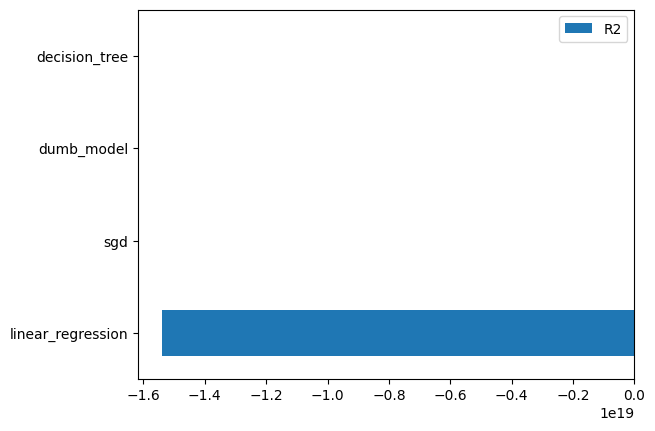

In [ ]:
(
    comparing_models_df
    .sort_values(by='R2')
    .plot.barh()
);

In [ ]:
sgd_mae = mean_absolute_error(y_true = y_test,
                  y_pred = sgd_predictions)
lr_mae = mean_absolute_error(y_true = y_test,
                 y_pred = lr_predictions)

comparing_models_df['MAE'] = [dumb_mae, dt_mae, sgd_mae, lr_mae]

comparing_models_df

,R2,MAE
dumb_model,3.928470e-01,4.230729e+04
decision_tree,7.314600e-01,2.526872e+04
sgd,-2.521723e+01,2.874385e+05
linear_regression,-1.539544e+19,2.684530e+13


In [ ]:
sgd_mape = mean_absolute_percentage_error(y_true = y_test,
                  y_pred = sgd_predictions)
lr_mape = mean_absolute_percentage_error(y_true = y_test,
                 y_pred = lr_predictions)

comparing_models_df['MAPE'] = [dumb_mape, dt_mape, sgd_mape, lr_mape]

comparing_models_df

,R2,MAE,MAPE
dumb_model,3.928470e-01,4.230729e+04,2.718268e-01
decision_tree,7.314600e-01,2.526872e+04,1.374938e-01
sgd,-2.521723e+01,2.874385e+05,1.927589e+00
linear_regression,-1.539544e+19,2.684530e+13,1.866344e+08


In [ ]:
sgd_rmse = root_mean_squared_error(y_true = y_test,
                  y_pred = sgd_predictions)
lr_rmse = root_mean_squared_error(y_true = y_test,
                 y_pred = lr_predictions)

comparing_models_df['RMSE'] = [dumb_rmse, dt_rmse, sgd_rmse, lr_rmse]

comparing_models_df

,R2,MAE,MAPE,RMSE
dumb_model,3.928470e-01,4.230729e+04,2.718268e-01,5.532856e+04
decision_tree,7.314600e-01,2.526872e+04,1.374938e-01,4.073664e+04
sgd,-2.521723e+01,2.874385e+05,1.927589e+00,4.025076e+05
linear_regression,-1.539544e+19,2.684530e+13,1.866344e+08,3.084443e+14


# 9.Assessing a regression model manually

## 9.1.Histogram of errors

### 9.1.1.Histogram of errors - dummy model

In [ ]:
X_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
148,60,RL,NaN,9505,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
677,70,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
1305,160,RM,32.0,3363,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
1373,60,RL,75.0,9750,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1428,50,RL,60.0,10930,Pave,Grvl,Reg,Bnk,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,70,RL,55.0,10592,Pave,NaN,Reg,Lvl,AllPub,Inside,...,53,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1060,50,RL,NaN,11275,Pave,NaN,IR1,HLS,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal
891,50,RL,60.0,8064,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,MnPrv,Shed,2000,7,2007,WD,Normal


In [ ]:
dummy_errors_df = X_test.copy()
dummy_errors_df["price"] = y_test
dummy_errors_df["prediction"] = dummy_y_test_pred
dummy_errors_df["error"] = dummy_errors_df["prediction"] - dummy_errors_df["price"]

In [ ]:
dummy_errors_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,price,prediction,error
count,292.000000,222.000000,292.000000,292.000000,292.000000,292.000000,292.000000,288.000000,292.000000,292.000000,...,292.000000,292.000000,292.00000,292.0,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,57.089041,72.103604,11172.003425,6.123288,5.541096,1972.743151,1984.297945,105.142361,430.160959,47.044521,...,25.349315,2.523973,18.25000,0.0,27.465753,6.438356,2007.643836,181737.702055,173130.602740,-8607.099315
std,41.716837,28.533113,11988.246845,1.304975,1.042906,29.416533,21.093075,191.669514,415.803918,145.850844,...,65.151169,22.432551,58.42235,0.0,173.543271,2.765702,1.296253,78745.480984,52452.399804,66610.417743
min,20.000000,21.000000,1680.000000,3.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.0,0.000000,1.000000,2006.000000,37900.000000,79040.000000,-346688.000000
25%,20.000000,58.250000,7637.750000,5.000000,5.000000,1954.000000,1964.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.0,0.000000,5.000000,2006.000000,130000.000000,135280.000000,-50936.000000
50%,50.000000,70.000000,9556.500000,6.000000,5.000000,1975.000000,1994.000000,0.000000,391.000000,0.000000,...,0.000000,0.000000,0.00000,0.0,0.000000,6.000000,2008.000000,165500.000000,162336.000000,7236.000000
75%,62.500000,81.750000,11494.250000,7.000000,6.000000,2001.000000,2004.000000,156.000000,697.250000,0.000000,...,0.000000,0.000000,0.00000,0.0,0.000000,8.000000,2009.000000,215000.000000,207100.000000,30870.000000
max,190.000000,313.000000,159000.000000,10.000000,9.000000,2009.000000,2009.000000,1600.000000,1567.000000,723.000000,...,318.000000,245.000000,410.00000,0.0,2000.000000,12.000000,2010.000000,625000.000000,382280.000000,186772.000000


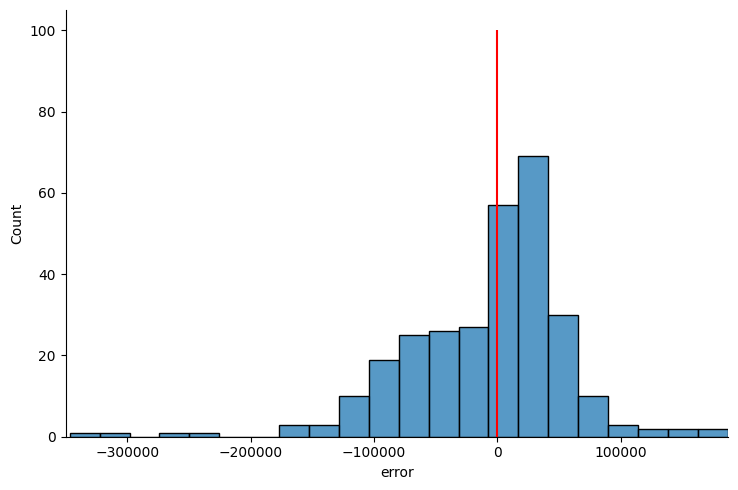

In [ ]:
sns.displot(dummy_errors_df['error'],
            aspect=1.5)
plt.vlines(x=0,
           ymin=0,
           ymax=100,
           color='red')
plt.xlim(-350000,
         187000)
plt.show()

### 9.1.2.Histogram of errors - decision tree model

In [ ]:
dt_errors_df = X_test.copy()
dt_errors_df["price"] = y_test
dt_errors_df["prediction"] = dt_predictions
dt_errors_df["error"] = dt_errors_df["prediction"] - dt_errors_df["price"]

In [ ]:
dt_errors_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,price,prediction,error
count,292.000000,222.000000,292.000000,292.000000,292.000000,292.000000,292.000000,288.000000,292.000000,292.000000,...,292.000000,292.000000,292.00000,292.0,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,57.089041,72.103604,11172.003425,6.123288,5.541096,1972.743151,1984.297945,105.142361,430.160959,47.044521,...,25.349315,2.523973,18.25000,0.0,27.465753,6.438356,2007.643836,181737.702055,180381.246575,-1356.455479
std,41.716837,28.533113,11988.246845,1.304975,1.042906,29.416533,21.093075,191.669514,415.803918,145.850844,...,65.151169,22.432551,58.42235,0.0,173.543271,2.765702,1.296253,78745.480984,77699.465326,40783.945165
min,20.000000,21.000000,1680.000000,3.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.0,0.000000,1.000000,2006.000000,37900.000000,58500.000000,-353000.000000
25%,20.000000,58.250000,7637.750000,5.000000,5.000000,1954.000000,1964.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.0,0.000000,5.000000,2006.000000,130000.000000,129975.000000,-16262.500000
50%,50.000000,70.000000,9556.500000,6.000000,5.000000,1975.000000,1994.000000,0.000000,391.000000,0.000000,...,0.000000,0.000000,0.00000,0.0,0.000000,6.000000,2008.000000,165500.000000,164200.000000,996.000000
75%,62.500000,81.750000,11494.250000,7.000000,6.000000,2001.000000,2004.000000,156.000000,697.250000,0.000000,...,0.000000,0.000000,0.00000,0.0,0.000000,8.000000,2009.000000,215000.000000,214625.000000,16712.500000
max,190.000000,313.000000,159000.000000,10.000000,9.000000,2009.000000,2009.000000,1600.000000,1567.000000,723.000000,...,318.000000,245.000000,410.00000,0.0,2000.000000,12.000000,2010.000000,625000.000000,755000.000000,148870.000000


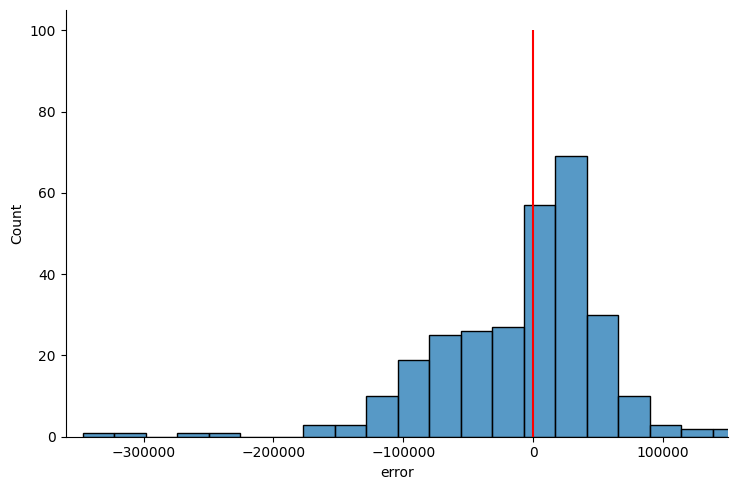

In [ ]:
sns.displot(dummy_errors_df['error'],
            aspect=1.5)
plt.vlines(x=0,
           ymin=0,
           ymax=100,
           color='red')
plt.xlim(-360000,
         150000)
plt.show()

## 9.2.Scatterplot of errors

### 9.2.1.Scatterplot of errors - dummy model

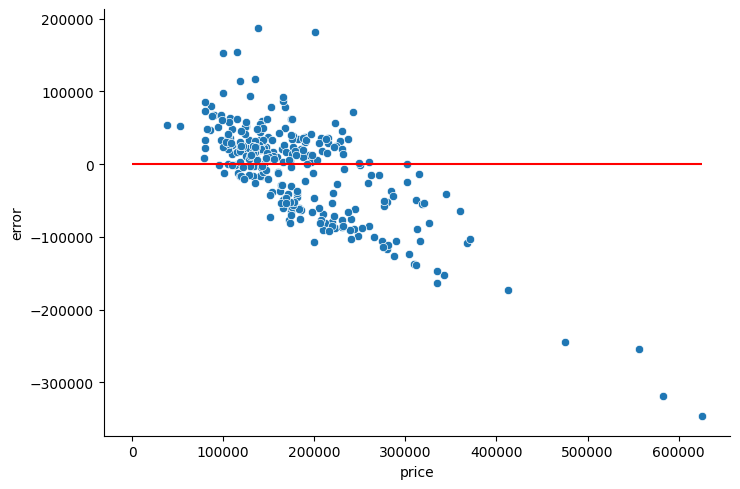

In [ ]:
sns.relplot(data=dummy_errors_df,
            x='price',
            y='error',
            aspect=1.5)
plt.hlines(y=0,
           xmin=0,
           xmax=max(dummy_errors_df['price']),
           color='red')
plt.show()

### 9.2.2.Scatterplot of errors - decision tree model

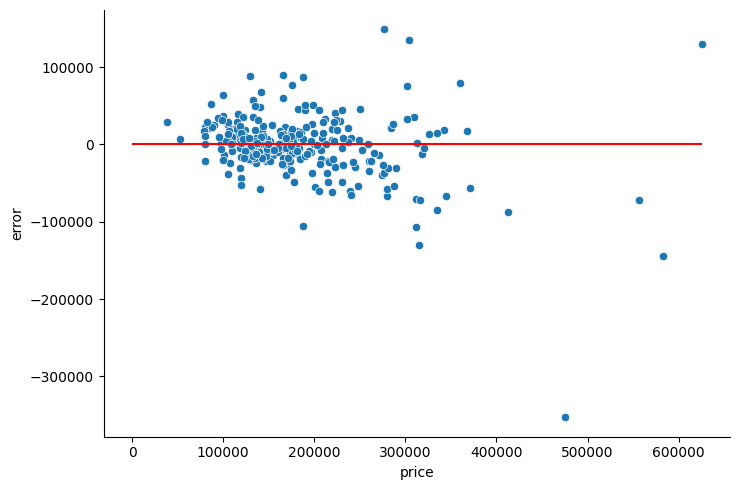

In [ ]:
sns.relplot(data=dt_errors_df,
            x='price',
            y='error',
            aspect=1.5)
plt.hlines(y=0,
           xmin=0,
           xmax=max(dt_errors_df['price']),
           color='red')
plt.show()